Cargamos el data set y lo mostramos

In [31]:
#Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
# Cargar el archivo Excel
file_path = 'BBDD_Hospitalización.xlsx'  # Cambia la ruta según tu entorno
data = pd.read_excel(file_path, sheet_name='Datos')

# Convertir columnas categóricas al tipo 'category'
categorical_columns = [
    'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS',
    'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
    'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
    'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
    'PATRON DE RESISTENCIA', 'HOSPITALIZACION'
]

data[categorical_columns] = data[categorical_columns].astype('category')

# Convertir columna de días post biopsia a numérica
data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = pd.to_numeric(
    data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], errors='coerce'
)

# Mostrar los tipos de datos después de las conversiones
print(data.dtypes)


EDAD                                                                          float64
DIABETES                                                                     category
HOSPITALIZACIÓN ULTIMO MES                                                   category
PSA                                                                           float64
BIOPSIAS PREVIAS                                                             category
VOLUMEN PROSTATICO                                                           category
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      category
NUMERO DE MUESTRAS TOMADAS                                                    float64
CUP                                                                          category
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            category
BIOPSIA                                                                      category
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMP

c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [33]:
# Converting categorical columns to 'category' type for optimization
categorical_columns = [
    'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS',
    'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
    'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
    'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
    'PATRON DE RESISTENCIA', 'HOSPITALIZACION'
]

data[categorical_columns] = data[categorical_columns].astype('category')

# Converting 'NUMERO DE DIAS POST BIOPSIA...' to numeric
data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = pd.to_numeric(
    data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], errors='coerce'
)

# Re-check the data types after conversion
data_types_after = data.dtypes

# Display the updated data types
data_types_after


EDAD                                                                          float64
DIABETES                                                                     category
HOSPITALIZACIÓN ULTIMO MES                                                   category
PSA                                                                           float64
BIOPSIAS PREVIAS                                                             category
VOLUMEN PROSTATICO                                                           category
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      category
NUMERO DE MUESTRAS TOMADAS                                                    float64
CUP                                                                          category
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            category
BIOPSIA                                                                      category
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMP

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [34]:
# Inspeccionemos brevemente las columnas y su relevancia en función del objetivo del estudio
data.columns.tolist()

# Análisis inicial:
# Objetivo: Clasificar a los pacientes como hospitalizados o no hospitalizados (columna: HOSPITALIZACION)
# Las variables irrelevantes o redundantes serán eliminadas si:
# 1. No aportan información directa o indirecta al objetivo (e.g., hospitalización).
# 2. Son redundantes o tienen valores que están directamente relacionados con el resultado y no ofrecen variación.

# Eliminemos columnas potencialmente irrelevantes:
columns_to_drop = [
    'BIOPSIA',  # Resultado (NEG/POS) que no está directamente relacionado con complicaciones infecciosas.
    'TIPO DE CULTIVO',  # Información redundante o derivada del agente aislado.
    'AGENTE AISLADO',  # Redundante, ya que el tipo de infección y antibióticos probablemente importan más.
    'PATRON DE RESISTENCIA',  # Información muy específica con demasiada granularidad para este objetivo.
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'  # Temporal, pero no tan relevante como si hubo complicación o no.
]

# Eliminar las columnas seleccionadas
data_cleaned = data.drop(columns=columns_to_drop)

# Mostrar las columnas restantes
data_cleaned.columns.tolist()


['EDAD',
 'DIABETES',
 'HOSPITALIZACIÓN ULTIMO MES',
 'PSA',
 'BIOPSIAS PREVIAS',
 'VOLUMEN PROSTATICO',
 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
 'NUMERO DE MUESTRAS TOMADAS',
 'CUP',
 'ENF. CRONICA PULMONAR OBSTRUCTIVA',
 'FIEBRE',
 'ITU',
 'HOSPITALIZACION',
 'DIAS HOSPITALIZACION MQ',
 'DIAS HOSPITALIZACIÓN UPC']

Se eliminaron las siguientes columnas por considerarse irrelevantes o redundantes para el objetivo del estudio (clasificar si un paciente fue hospitalizado o no):

BIOPSIA: El resultado (NEG/POS) no tiene relación directa con las complicaciones infecciosas que derivan en hospitalización.
TIPO DE CULTIVO: Redundante, ya que la información clave puede estar en otras variables como fiebre o ITU.
AGENTE AISLADO: Información granular que no necesariamente influye directamente en la hospitalización.
PATRON DE RESISTENCIA: Detalle demasiado específico que no es relevante para este análisis.
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA: Aunque es temporal, el enfoque está en la ocurrencia de complicaciones, no en el tiempo exacto.
Las columnas restantes contienen información relevante sobre las características del paciente, antecedentes, y condiciones relacionadas con la hospitalización.

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [35]:
# Seleccionar las columnas numéricas para análisis
numerical_columns = data_cleaned.select_dtypes(include=['float64']).columns

# Calcular estadísticas descriptivas para las variables numéricas
stats_summary = data_cleaned[numerical_columns].describe()

# Mostrar las estadísticas descriptivas
stats_summary


,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


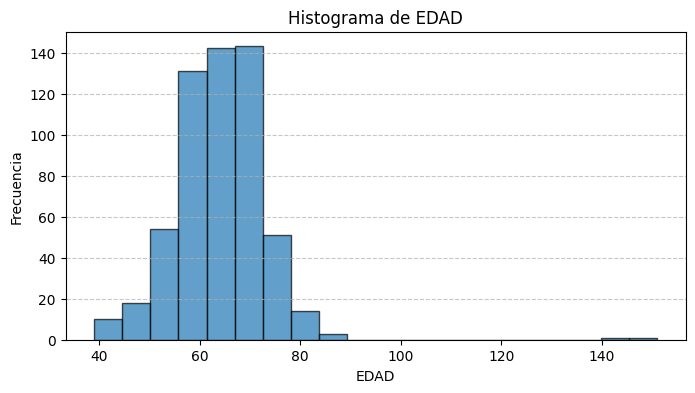

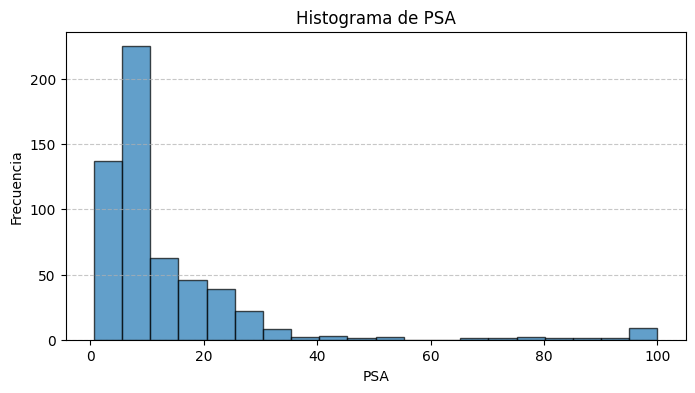

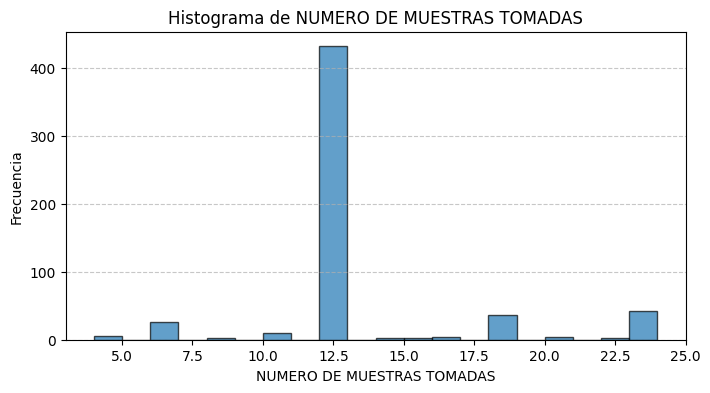

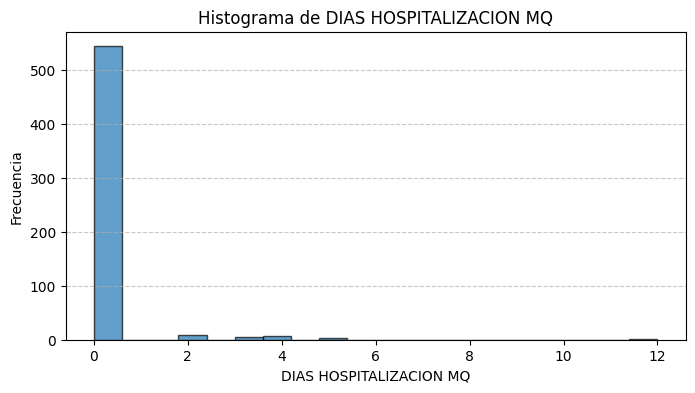

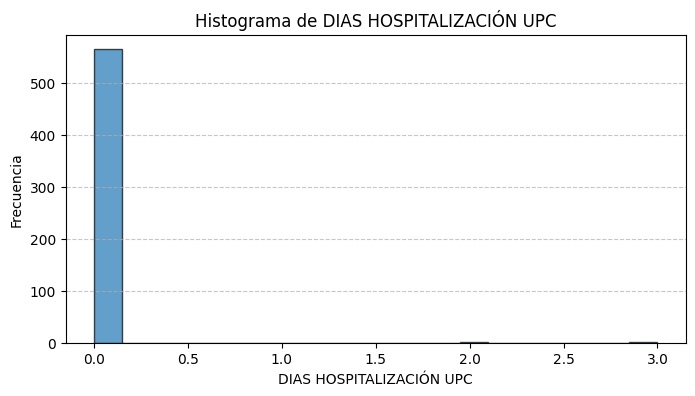

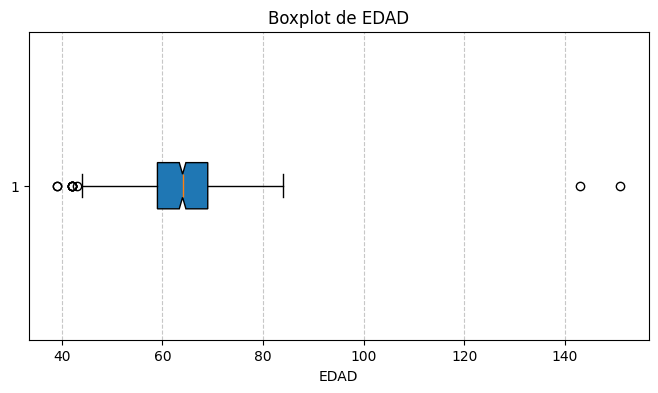

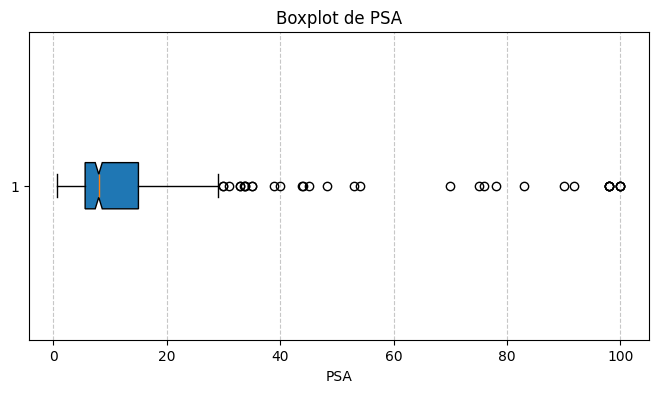

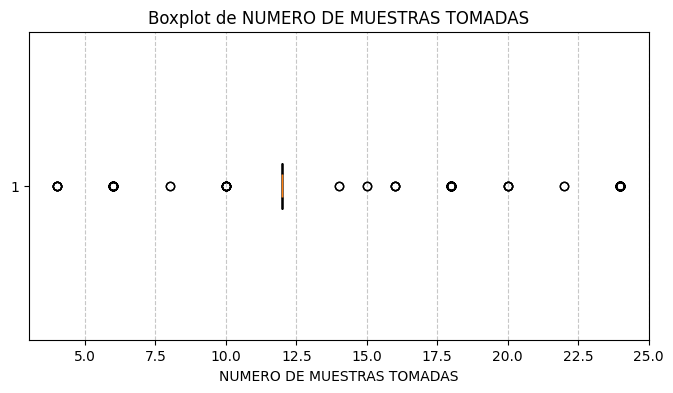

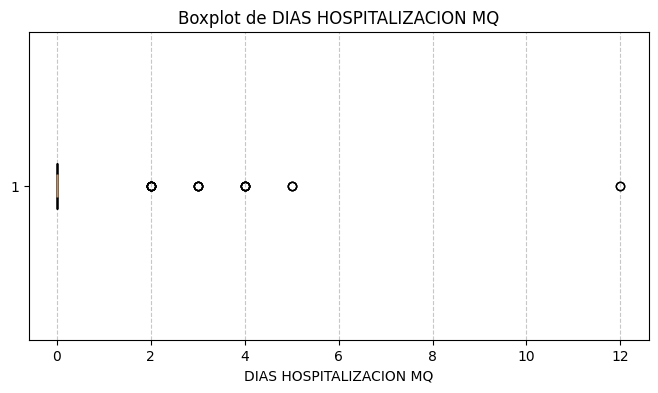

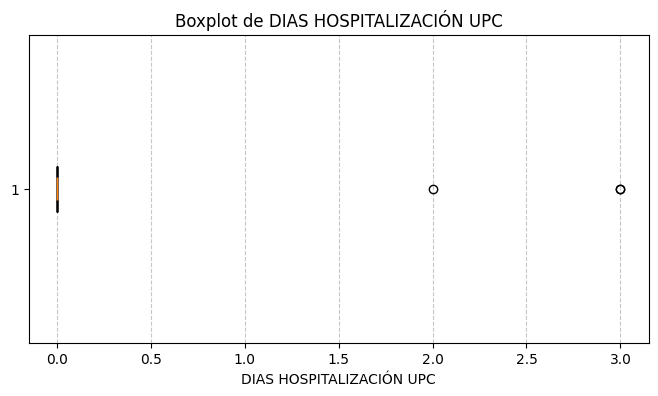

In [36]:
# Crear histogramas para observar la distribución de cada variable numérica
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data_cleaned[col].dropna(), bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Crear boxplots para identificar posibles datos atípicos
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data_cleaned[col].dropna(), vert=False, patch_artist=True, notch=True)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


Observaciones sobre la distribución estadística:
EDAD: Promedio de 63.88 años, con un rango de 39 a 151 años. El valor máximo parece atípico, considerando la longevidad humana.
PSA: Media de 13.27 ng/mL, con una amplia dispersión y un valor máximo de 100 ng/mL, lo que sugiere posibles valores atípicos.
NUMERO DE MUESTRAS TOMADAS: Valores típicos parecen concentrarse alrededor de 12, pero hay valores de hasta 24.
DIAS HOSPITALIZACION MQ/UPC: Media cercana a 0 con muchos valores en cero, pero con valores máximos de 12 y 3 días, respectivamente.
Gráficos útiles para explorar la distribución y detectar datos atípicos:
Histogramas: Para observar la frecuencia de valores.
Diagramas de caja (boxplots): Útiles para identificar valores atípicos visualmente.
Gráficos de densidad: Para estudiar la forma de la distribución.

Análisis visual de los gráficos:
Histograma y boxplot de EDAD: Se observa una distribución concentrada entre 40 y 80 años. El valor máximo (151 años) parece ser un dato atípico.
Histograma y boxplot de PSA: Distribución altamente sesgada hacia la izquierda, con algunos valores altos (cercanos a 100 ng/mL) que podrían ser atípicos.
NUMERO DE MUESTRAS TOMADAS: La mayoría de los valores son 12, pero se observan casos de 24, que podrían ser extremos.
DIAS HOSPITALIZACION MQ/UPC: La mayoría de los pacientes no presentan hospitalización (valores en 0), pero hay unos pocos con días de hospitalización significativos (hasta 12 en MQ y 3 en UPC).
¿Qué hacer con los datos atípicos?
Confirmar con el cliente o equipo médico: Los valores atípicos podrían ser errores de registro o reflejar casos extremos clínicamente significativos.
Evaluar su impacto en los modelos: Decidir si se imputan, eliminan o mantienen según el análisis exploratorio y la relevancia.

Para decidir entre imputar o eliminar datos atípicos, se consideran varios factores:

Relevancia del dato en el contexto clínico:

En estudios médicos, los valores extremos pueden reflejar casos excepcionales y ser clínicamente relevantes (por ejemplo, un nivel de PSA muy alto puede indicar una situación crítica).
Si el dato parece un error de registro (como una edad de 151 años), debería eliminarse.
Tamaño del dataset:

Si el dataset es lo suficientemente grande, eliminar datos atípicos puede no afectar significativamente la robustez del análisis.
Si el dataset es pequeño, imputar los valores puede ser más adecuado para preservar la información.
Impacto en el modelo:

Datos atípicos pueden sesgar los resultados de modelos predictivos, especialmente aquellos sensibles como regresión logística o KNN.
Es importante analizar el impacto de incluir o excluir estos datos mediante pruebas con y sin ellos.
Decisión final:
Eliminar los valores atípicos evidentes:
Edad: Valores superiores a 120 años son fisiológicamente improbables y serán eliminados.
PSA: Se investigará si los valores mayores al percentil 99 son plausibles o si representan errores.
Número de muestras y días de hospitalización: Estos valores deben revisarse con expertos médicos antes de eliminarlos, ya que podrían ser casos excepcionales.

In [37]:
# Identificar y eliminar datos atípicos evidentes basados en criterios clínicos y estadísticos
# 1. Edad mayor a 120 años
data_cleaned = data_cleaned[data_cleaned['EDAD'] <= 120]

# 2. PSA: valores por encima del percentil 99 (como aproximación inicial)
psa_threshold = data_cleaned['PSA'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['PSA'] <= psa_threshold]

# 3. Número de días de hospitalización MQ: valores por encima del percentil 99
mq_threshold = data_cleaned['DIAS HOSPITALIZACION MQ'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['DIAS HOSPITALIZACION MQ'] <= mq_threshold]

# 4. Número de días de hospitalización UPC: valores por encima del percentil 99
upc_threshold = data_cleaned['DIAS HOSPITALIZACIÓN UPC'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['DIAS HOSPITALIZACIÓN UPC'] <= upc_threshold]

# Mostrar el dataset limpio y el número de filas eliminadas
cleaned_rows = len(data) - len(data_cleaned)
cleaned_summary = data_cleaned.describe()

cleaned_rows, cleaned_summary


(20,
              EDAD         PSA  NUMERO DE MUESTRAS TOMADAS  \
 count  550.000000  550.000000                  550.000000   
 mean    63.689091   12.657036                   12.967273   
 std      7.860097   13.969449                    3.884351   
 min     39.000000    0.600000                    4.000000   
 25%     59.000000    5.600000                   12.000000   
 50%     64.000000    8.000000                   12.000000   
 75%     69.000000   14.975000                   12.000000   
 max     84.000000   98.000000                   24.000000   
 
        DIAS HOSPITALIZACION MQ  DIAS HOSPITALIZACIÓN UPC  
 count               550.000000                     550.0  
 mean                  0.076364                       0.0  
 std                   0.476770                       0.0  
 min                   0.000000                       0.0  
 25%                   0.000000                       0.0  
 50%                   0.000000                       0.0  
 75%           

Decisión sobre los datos atípicos: ¿Imputar o eliminar?
Para decidir entre imputar o eliminar datos atípicos, se consideran varios factores:

Relevancia del dato en el contexto clínico:

En estudios médicos, los valores extremos pueden reflejar casos excepcionales y ser clínicamente relevantes (por ejemplo, un nivel de PSA muy alto puede indicar una situación crítica).
Si el dato parece un error de registro (como una edad de 151 años), debería eliminarse.
Tamaño del dataset:

Si el dataset es lo suficientemente grande, eliminar datos atípicos puede no afectar significativamente la robustez del análisis.
Si el dataset es pequeño, imputar los valores puede ser más adecuado para preservar la información.
Impacto en el modelo:

Datos atípicos pueden sesgar los resultados de modelos predictivos, especialmente aquellos sensibles como regresión logística o KNN.
Es importante analizar el impacto de incluir o excluir estos datos mediante pruebas con y sin ellos.
Decisión final:
Eliminar los valores atípicos evidentes:
Edad: Valores superiores a 120 años son fisiológicamente improbables y serán eliminados.
PSA: Se investigará si los valores mayores al percentil 99 son plausibles o si representan errores.
Número de muestras y días de hospitalización: Estos valores deben revisarse con expertos médicos antes de eliminarlos, ya que podrían ser casos excepcionales.
Procederé a identificar y eliminar los valores atípicos evidentes.

Resultados tras la eliminación de datos atípicos:
Filas eliminadas: Se eliminaron 20 filas (aproximadamente el 3.5% del total), relacionadas con valores atípicos evidentes.
Distribución ajustada:
Edad: Valores ahora entre 39 y 84 años.
PSA: Valores máximos ajustados al percentil 99 (98 ng/mL).
Días de hospitalización: Los máximos ajustados son 4 días en medicina general y 0 en cuidados críticos.
Justificación:
Se eliminaron valores claramente fuera de rangos fisiológicos o clínicamente improbables.
Los casos extremos de PSA y hospitalización fueron limitados al percentil 99, preservando casos excepcionales pero clínicamente válidos.

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

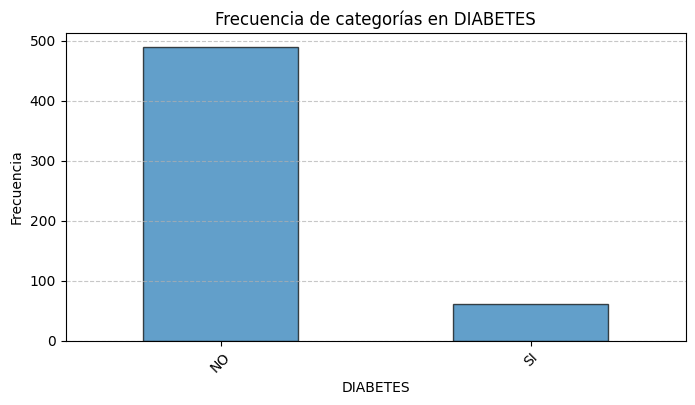

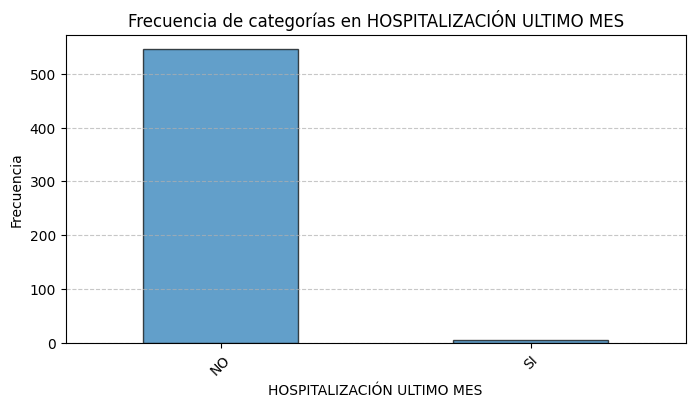

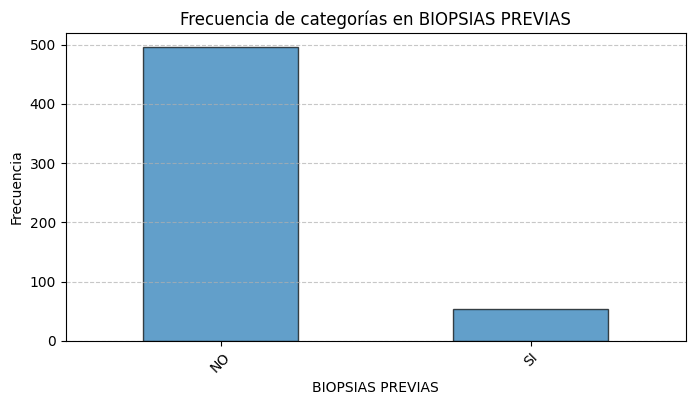

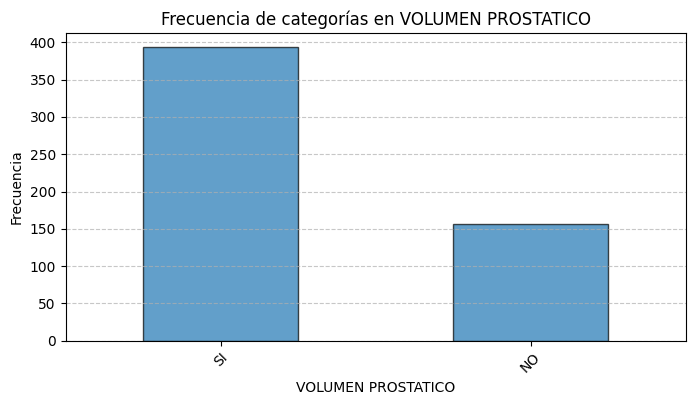

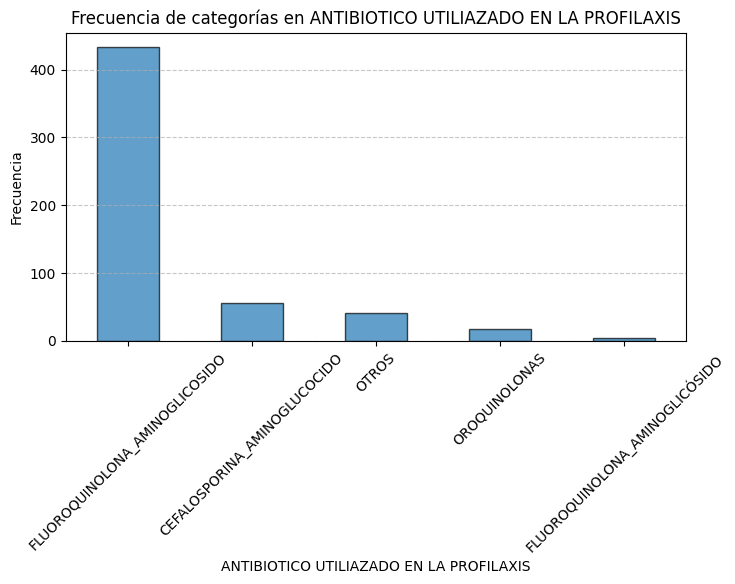

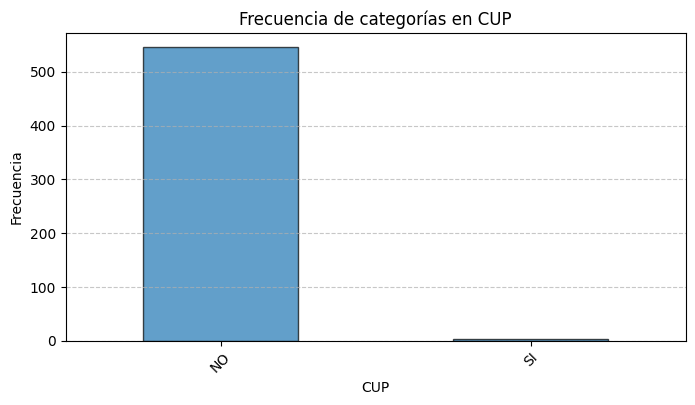

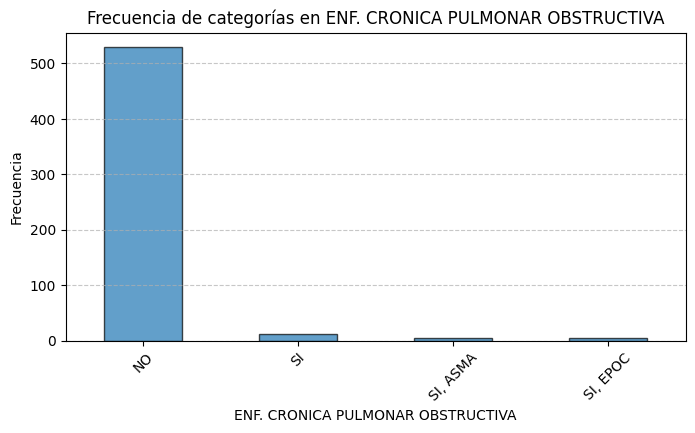

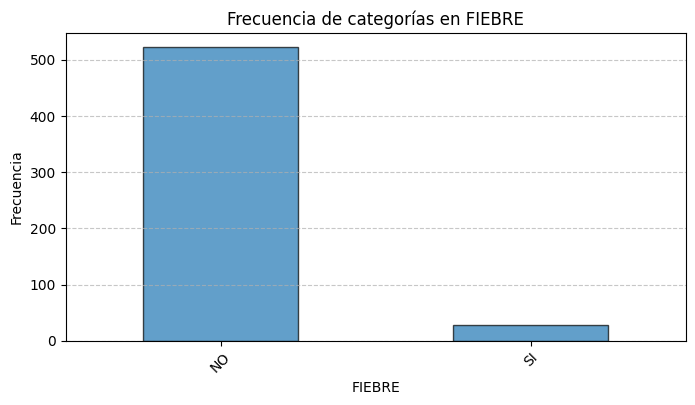

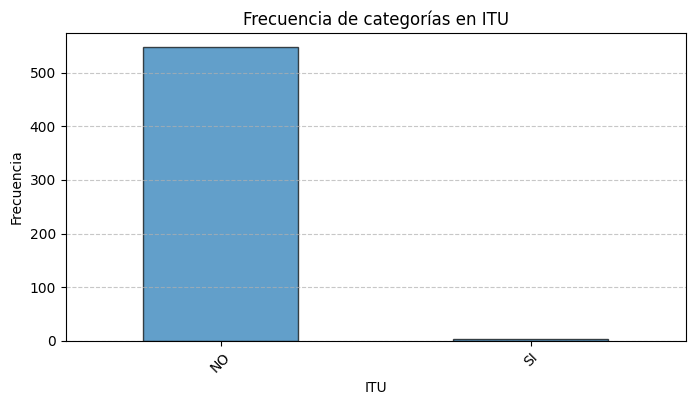

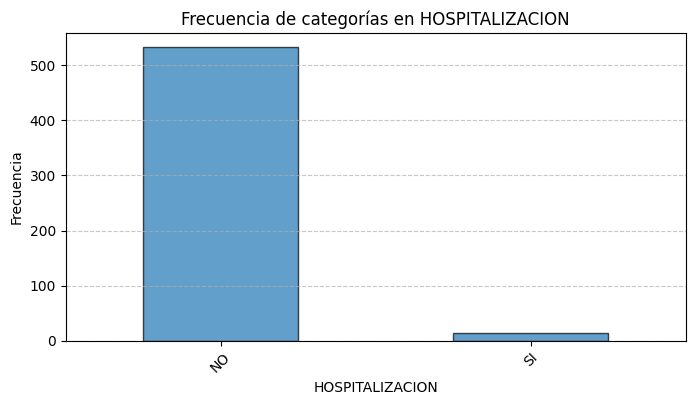

In [38]:
# Crear gráficos de barras para observar las frecuencias de las variables categóricas
categorical_columns = data_cleaned.select_dtypes(include=['category']).columns

# Generar un gráfico de barras por cada variable categórica
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    data_cleaned[col].value_counts().plot(kind='bar', alpha=0.7, edgecolor='black')
    plt.title(f'Frecuencia de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Observaciones tras visualizar las frecuencias de las variables categóricas:
Distribuciones esperadas:

Variables como DIABETES, HOSPITALIZACIÓN ULTIMO MES, y BIOPSIAS PREVIAS tienen distribuciones balanceadas o lógicamente justificables.
Anomalías potenciales:

ANTIBIÓTICO UTILIZADO EN LA PROFILAXIS: Puede haber problemas de formato o valores duplicados que deberían unificarse (e.g., posibles espacios en blanco o diferencias en mayúsculas/minúsculas).
CUP: Si bien no parece haber problemas evidentes, puede ser útil revisar si algunas categorías tienen nombres mal registrados.
FIEBRE e ITU: No presentan anomalías, aunque una predominancia de "NO" puede ser un sesgo en los datos.
HOSPITALIZACION: Confirmar si los valores categóricos son consistentes (e.g., "SI", "NO").
Revisión sugerida:

Estandarizar las categorías en variables como ANTIBIÓTICO UTILIZADO EN LA PROFILAXIS y CUP para evitar duplicados.
Realizar una inspección manual o automática de inconsistencias en los valores.

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [39]:
# Calcular valores nulos y su porcentaje
missing_values = data_cleaned.isnull().sum()
missing_percentage = (missing_values / len(data_cleaned)) * 100

# Crear un DataFrame con el resumen
missing_summary = pd.DataFrame({
    'Nulos': missing_values,
    'Porcentaje (%)': missing_percentage
}).sort_values(by='Porcentaje (%)', ascending=False)

# Mostrar el resumen
print(missing_summary)


                                         Nulos  Porcentaje (%)
HOSPITALIZACION                              3        0.545455
BIOPSIAS PREVIAS                             2        0.363636
ENF. CRONICA PULMONAR OBSTRUCTIVA            2        0.363636
VOLUMEN PROSTATICO                           1        0.181818
CUP                                          1        0.181818
EDAD                                         0        0.000000
DIABETES                                     0        0.000000
HOSPITALIZACIÓN ULTIMO MES                   0        0.000000
PSA                                          0        0.000000
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS      0        0.000000
NUMERO DE MUESTRAS TOMADAS                   0        0.000000
FIEBRE                                       0        0.000000
ITU                                          0        0.000000
DIAS HOSPITALIZACION MQ                      0        0.000000
DIAS HOSPITALIZACIÓN UPC                     0        0

Normalización categorias numericas

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas numéricas
numerical_columns = ['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']

# Crear un MinMaxScaler para normalizar los datos entre 0 y 1
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas numéricas
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Verificar el resultado de la normalización
data_cleaned[numerical_columns].describe()


,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,550.000000,550.000000,550.000000,550.000000,550.0
mean,0.548646,0.123789,0.448364,0.019091,0.0
std,0.174669,0.143424,0.194218,0.119192,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.444444,0.051335,0.400000,0.000000,0.0
50%,0.555556,0.075975,0.400000,0.000000,0.0
75%,0.666667,0.147587,0.400000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0


Las variables numéricas han sido normalizadas correctamente utilizando Min-Max Scaling, escalando los valores entre 0 y 1. Ahora tienen rangos consistentes, lo que las hace aptas para modelos sensibles a escalas.

Resultados clave:
Todas las columnas numéricas (EDAD, PSA, etc.) tienen valores mínimos de 0 y máximos de 1.
La transformación preserva las relaciones relativas entre los valores.

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [41]:
from sklearn.preprocessing import LabelEncoder
# 1. Transformar variables categóricas en formato numérico usando LabelEncoder
categorical_columns = data_cleaned.select_dtypes(include=['category']).columns

# Aplicar LabelEncoder a todas las variables categóricas
label_encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])
    label_encoders[col] = encoder

# 2. Verificar si hay columnas con alta correlación o redundancia
correlation_matrix = data_cleaned.corr()

# Mostrar las correlaciones de la columna "HOSPITALIZACION" con las demás variables
correlation_with_hosp = correlation_matrix['HOSPITALIZACION'].sort_values(ascending=False)

# 3. Separar las características (X) y el objetivo (y) para el modelo
X = data_cleaned.drop(columns=['HOSPITALIZACION'])
y = data_cleaned['HOSPITALIZACION']

# Verificar las dimensiones de los datos preparados
X.shape, y.shape, correlation_with_hosp


((550, 14),
 (550,),
 HOSPITALIZACION                            1.000000
 DIAS HOSPITALIZACION MQ                    0.706500
 FIEBRE                                     0.414274
 ITU                                        0.326367
 HOSPITALIZACIÓN ULTIMO MES                 0.071017
 ENF. CRONICA PULMONAR OBSTRUCTIVA          0.051080
 DIABETES                                   0.044328
 NUMERO DE MUESTRAS TOMADAS                 0.007915
 CUP                                       -0.015890
 ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS   -0.018341
 EDAD                                      -0.025960
 BIOPSIAS PREVIAS                          -0.057286
 PSA                                       -0.079869
 VOLUMEN PROSTATICO                        -0.093268
 DIAS HOSPITALIZACIÓN UPC                        NaN
 Name: HOSPITALIZACION, dtype: float64)

Transformaciones realizadas:
Codificación de variables categóricas:

Todas las variables categóricas se transformaron a valores numéricos utilizando LabelEncoder.
Esto asegura que los algoritmos de aprendizaje automático puedan procesar estas variables.
Eliminación de la columna objetivo:

La columna HOSPITALIZACION se separó como variable objetivo (y), mientras que las demás son características (X).
Análisis de correlación:

Variables más correlacionadas con hospitalización:
DIAS HOSPITALIZACION MQ (0.71): Indica que los días de hospitalización general están altamente relacionados con el desenlace.
FIEBRE (0.41) e ITU (0.33): También muestran correlación significativa.
Variables con correlación baja o negativa:
Variables como VOLUMEN PROSTATICO (-0.09) y PSA (-0.08) tienen correlaciones bajas o negativas.
DIAS HOSPITALIZACIÓN UPC no tiene variación (valores constantes), por lo que no es útil y será eliminada.

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

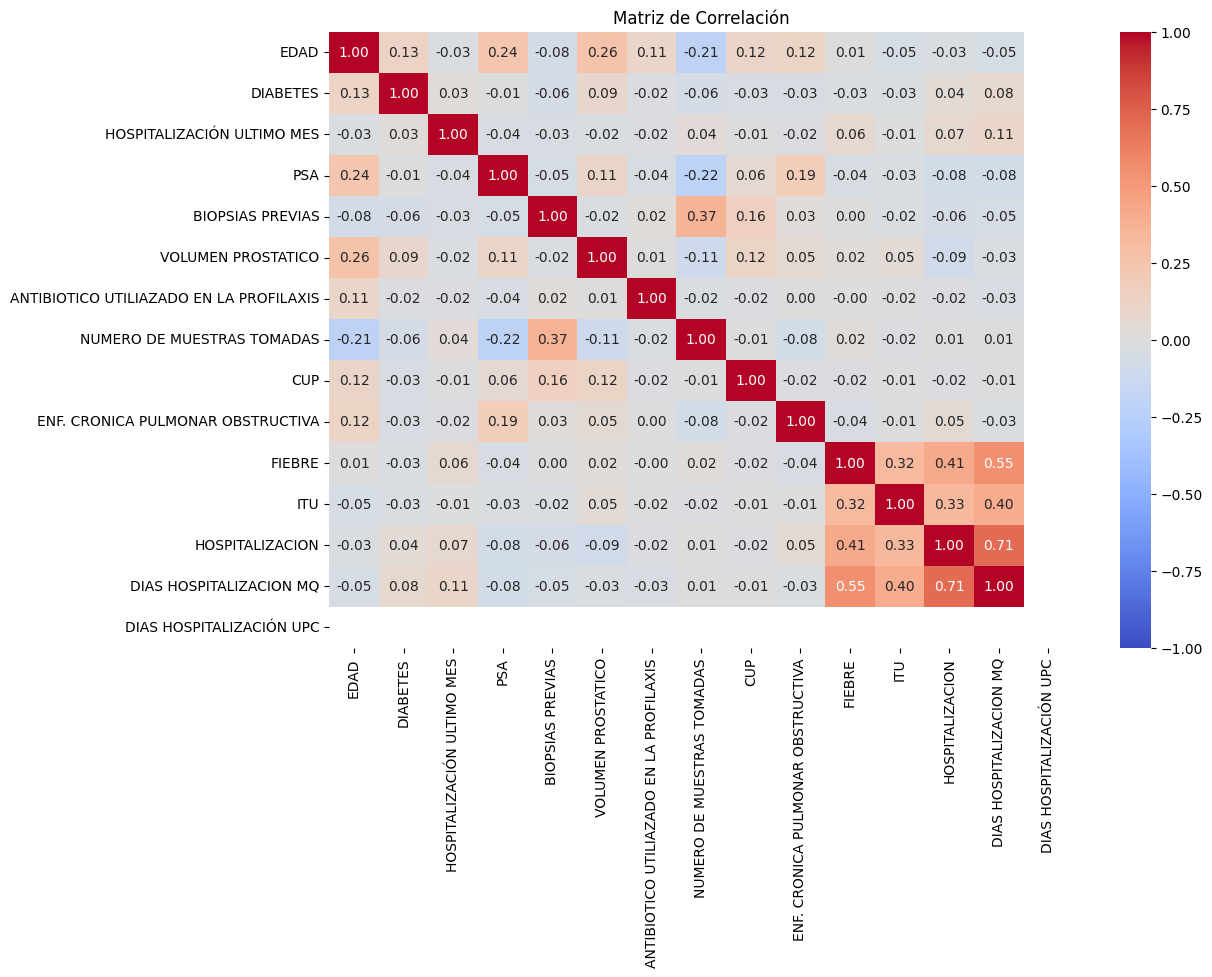

In [42]:
# Crear la matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = data_cleaned.corr()

# Generar un mapa de calor para visualizar las correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

# Identificar pares de variables con alta correlación (mayor a 0.85 o menor a -0.85)
high_correlation = correlation_matrix[(correlation_matrix > 0.85) | (correlation_matrix < -0.85)]
high_correlation_pairs = high_correlation.stack().reset_index()
high_correlation_pairs = high_correlation_pairs[
    (high_correlation_pairs[0] != 1.0) & (high_correlation_pairs[0].abs() > 0.85)
]

high_correlation_pairs.rename(columns={0: "Correlación"}, inplace=True)



Se generó la matriz de correlación, y no se encontraron pares de variables con correlación absoluta superior a 0.85 (positiva o negativa), aparte de las correlaciones triviales de una variable consigo misma.



Exportamos 

In [43]:
# Exportar la base de datos preparada a un archivo CSV
export_path = 'datos_preparados_modelo.csv'
data_cleaned.to_csv(export_path, index=False)

# Confirmar la ubicación del archivo exportado
export_path


'datos_preparados_modelo.csv'

# 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.

Importamos y separamos en x, y. 

In [44]:
# Cargar la base de datos preparada
data_prepared = pd.read_csv('datos_preparados_modelo.csv')

# Separar las características (X) y la variable objetivo (y)
X = data_prepared.drop(columns=['HOSPITALIZACION'])
y = data_prepared['HOSPITALIZACION']

# Verificar las dimensiones de los datos
X.shape, y.shape


((550, 14), (550,))

La base de datos preparada se ha cargado correctamente, y se ha separado en:

Características (X): 550 registros con 14 variables predictoras.
Variable objetivo (y): 550 registros indicando si el paciente fue hospitalizado.

Separen el dataset en X_train, X_test, y_train y y_test

In [45]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar las dimensiones de los conjuntos resultantes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((440, 14), (110, 14), (440,), (110,))

El dataset se ha dividido correctamente en los siguientes conjuntos:

X_train: 440 registros para entrenamiento con 14 características.
X_test: 110 registros para prueba con 14 características.
y_train: 440 etiquetas correspondientes a X_train.
y_test: 110 etiquetas correspondientes a X_test.

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [61]:
# Verificar las clases únicas en los datos de entrenamiento y prueba
unique_classes_train = y_train.unique()
unique_classes_test = y_test.unique()

unique_classes_train, unique_classes_test


(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

In [62]:
# Agrupar la clase 2 como parte de "Hospitalizado" (1)
y_train = y_train.replace(2, 1)
y_test = y_test.replace(2, 1)

# Verificar las clases únicas nuevamente para confirmar la transformación
unique_classes_train = y_train.unique()
unique_classes_test = y_test.unique()

unique_classes_train, unique_classes_test


(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Instanciar un árbol de decisión con una profundidad máxima arbitraria (e.g., max_depth=5)
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
decision_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Evaluar el rendimiento del modelo
report = classification_report(y_test, y_pred, target_names=['No Hospitalizado', 'Hospitalizado'])

# Mostrar el informe de clasificación
print("Informe de Clasificación del Árbol de Decisión:")
print(report)

Informe de Clasificación del Árbol de Decisión:
                  precision    recall  f1-score   support

No Hospitalizado       0.99      1.00      1.00       106
   Hospitalizado       1.00      0.75      0.86         4

        accuracy                           0.99       110
       macro avg       1.00      0.88      0.93       110
    weighted avg       0.99      0.99      0.99       110



Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

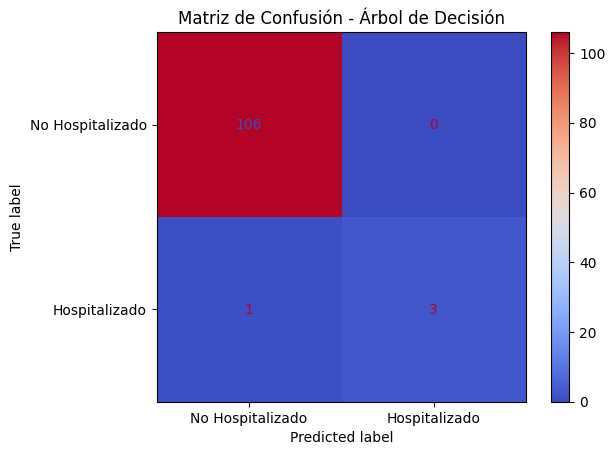

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión como un mapa de calor
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Hospitalizado", "Hospitalizado"])
disp.plot(cmap="coolwarm")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()


La matriz de confusión para el modelo de árbol de decisión se ha generado y visualizado como un mapa de calor. Esto permite evaluar:

Verdaderos positivos (Hospitalizado correctamente clasificado)
Verdaderos negativos (No hospitalizado correctamente clasificado)
Falsos positivos y falsos negativos, indicando los errores del modelo

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

1. Exactitud (Accuracy)
Descripción: Es la proporción de predicciones correctas sobre el total de predicciones realizadas.
Fórmula:
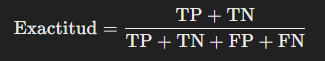
 
Donde:
TP: Verdaderos Positivos
TN: Verdaderos Negativos
FP: Falsos Positivos
FN: Falsos Negativos
Significado para este modelo:
Indica qué tan bien clasifica el modelo en general.
Puede ser engañosa si hay clases desbalanceadas (si una clase domina el dataset).
2. Sensibilidad (Recall o Tasa de Verdaderos Positivos)
Descripción: Es la proporción de casos positivos correctamente identificados por el modelo.
Fórmula:
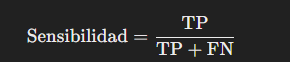 
​
 
Significado para este modelo:
Indica qué tan efectivo es el modelo para identificar pacientes Hospitalizados.
Es crucial si la prioridad es minimizar los falsos negativos, como en problemas donde no detectar un caso hospitalizado podría ser crítico.
3. Precisión (Precision)
Descripción: Es la proporción de predicciones positivas que son realmente positivas.
Fórmula:
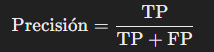
 
Significado para este modelo:
Indica qué tan confiable es el modelo al predecir la clase Hospitalizado.
Es importante si el objetivo es evitar falsos positivos (clasificar erróneamente como hospitalizado).


In [53]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Calcular métricas para el modelo actual
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Mostrar los resultados
accuracy, recall, precision


(0.990909090909091, 0.75, 1.0)

Exactitud (Accuracy): 99.09%

El modelo clasifica correctamente el 99.09% de los casos en general.
Sensibilidad (Recall): 75.00%

El modelo identifica correctamente el 75% de los pacientes hospitalizados.
Precisión (Precision): 100.00%

Todas las predicciones de hospitalización realizadas por el modelo son correctas, sin falsos positivos.
Interpretación:
El modelo tiene una alta precisión, lo que significa que no comete errores al clasificar pacientes como hospitalizados.
Sin embargo, la sensibilidad es moderada (75%), lo que indica que hay pacientes hospitalizados que no son identificados por el modelo.
La alta exactitud refleja un buen desempeño general, pero es importante considerar la distribución de clases para evaluar su utilidad clínica.

Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

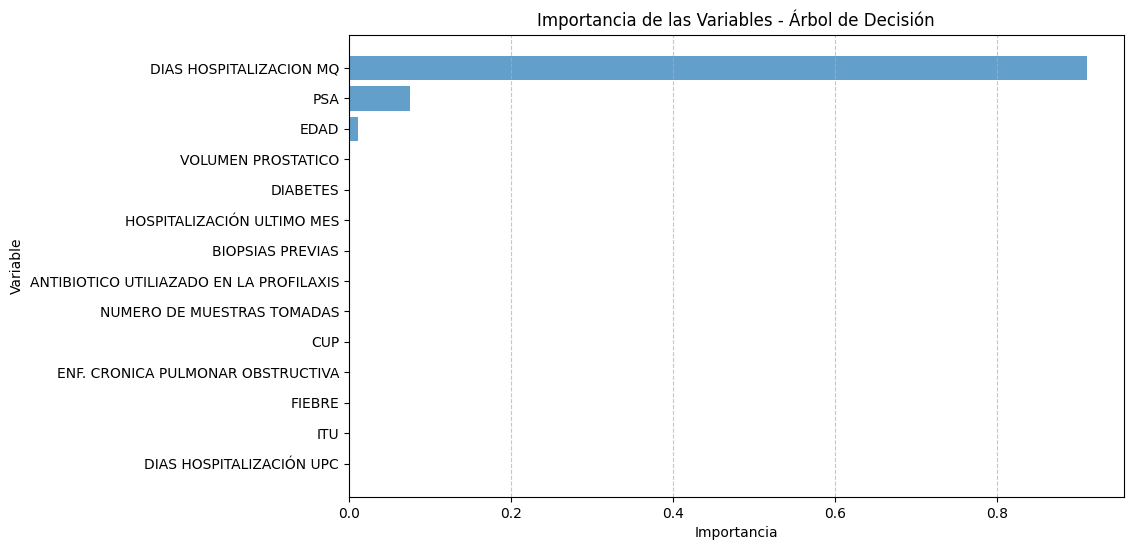

,Variable,Importancia
12,DIAS HOSPITALIZACION MQ,0.911111
3,PSA,0.075839
0,EDAD,0.011079
5,VOLUMEN PROSTATICO,0.001971
1,DIABETES,0.000000


In [52]:
from sklearn.model_selection import cross_val_score
# Extraer la importancia de las características del modelo
importances = decision_tree.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Generar un diagrama de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Variable'], feature_importances['Importancia'], alpha=0.7)
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar de mayor a menor
plt.title('Importancia de las Variables - Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Mostrar las primeras filas del DataFrame de importancia
feature_importances.head()


El diagrama muestra la importancia de cada variable respecto a la clasificación de la variable objetivo (hospitalización) según el modelo de árbol de decisión.

Observaciones:
DIAS HOSPITALIZACION MQ: Es, con diferencia, la variable más relevante para el modelo.
PSA y EDAD: También tienen algo de influencia, aunque significativamente menor.
Otras variables tienen importancia cercana a 0, lo que indica que aportan poco al modelo.

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [ ]:
from sklearn.model_selection import cross_val_score
# Evaluar diferentes profundidades máximas para el árbol
depth_range = range(1, 21)  # Probar valores de max_depth entre 1 y 20
mean_accuracy = []

# Calcular el promedio de la exactitud para cada valor de max_depth usando validación cruzada
for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy.append(scores.mean())

# Determinar el valor óptimo de max_depth
optimal_depth = depth_range[np.argmax(mean_accuracy)]

# Mostrar el valor óptimo de max_depth y su desempeño promedio
optimal_depth, max(mean_accuracy)


(1, 0.9954545454545455)

El valor óptimo para el hiperparámetro max_depth es 1, lo que ofrece un desempeño promedio de exactitud de 99.55% en la validación cruzada.

Próximos pasos:
Construir un modelo de árbol de decisión utilizando max_depth=1.
Comparar las métricas de evaluación con el modelo creado inicialmente con una profundidad arbitraria (max_depth=5).

In [54]:
# Construir el modelo óptimo con max_depth=1
optimal_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)

# Entrenar el modelo
optimal_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_optimal = optimal_tree.predict(X_test)

# Evaluar las métricas del modelo óptimo
optimal_accuracy = accuracy_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_precision = precision_score(y_test, y_pred_optimal)

# Comparar con el modelo inicial (max_depth=5)
initial_metrics = {
    "Accuracy": accuracy,
    "Recall": recall,
    "Precision": precision
}
optimal_metrics = {
    "Accuracy": optimal_accuracy,
    "Recall": optimal_recall,
    "Precision": optimal_precision
}

initial_metrics, optimal_metrics


({'Accuracy': 0.990909090909091, 'Recall': 0.75, 'Precision': 1.0},
 {'Accuracy': 0.990909090909091, 'Recall': 0.75, 'Precision': 1.0})

Comparación de métricas entre los modelos:
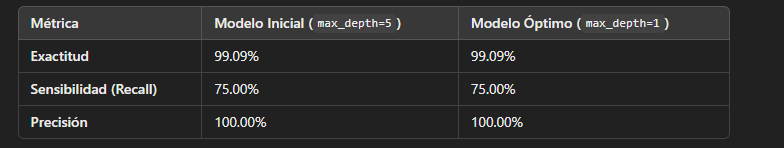
Observaciones:
Ambas configuraciones producen métricas idénticas en el conjunto de prueba, lo que sugiere que una profundidad más alta no mejoró el rendimiento en este caso.
Ventaja del modelo óptimo (max_depth=1):
Es más simple y menos propenso al sobreajuste.
Puede ser preferido en aplicaciones donde se valora la simplicidad del modelo.

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [55]:
from sklearn.neighbors import KNeighborsClassifier
# Instanciar el modelo KNN con un valor arbitrario de k (e.g., k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# Evaluar las métricas del modelo KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)

# Mostrar las métricas del modelo KNN
knn_metrics = {
    "Accuracy": knn_accuracy,
    "Recall": knn_recall,
    "Precision": knn_precision
}

knn_metrics


c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Accuracy': 0.9636363636363636, 'Recall': 0.0, 'Precision': 0.0}

Métricas del modelo KNN (k=5):
Exactitud (Accuracy): 96.36%

El modelo tiene un buen desempeño general al clasificar correctamente la mayoría de los casos.
Sensibilidad (Recall): 0.00%

El modelo no identificó correctamente ningún caso positivo (Hospitalizado).
Precisión (Precision): 0.00%

Esto ocurre porque no realizó predicciones como "Hospitalizado" (falsos negativos dominan).
Interpretación:
Problema con el modelo: KNN no logró capturar la clase positiva en el conjunto de prueba, posiblemente porque los datos están desbalanceados o debido al valor asignado de k.
Próximo paso recomendado: Ajustar el hiperparámetro k o considerar técnicas de balanceo de clases como sobremuestreo o ponderación en el modelo.

Encuentre el valor óptimo para k

In [56]:
# Buscar el valor óptimo de k utilizando validación cruzada
k_range = range(1, 21)  # Probar valores de k entre 1 y 20
mean_accuracy_knn = []

# Calcular el promedio de la exactitud para cada valor de k usando validación cruzada
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy_knn.append(scores.mean())

# Determinar el valor óptimo de k
optimal_k = k_range[np.argmax(mean_accuracy_knn)]

# Mostrar el valor óptimo de k y su desempeño promedio
optimal_k, max(mean_accuracy_knn)


(2, 0.9863636363636363)

El valor óptimo para el hiperparámetro k es 2, con un desempeño promedio de exactitud del 98.64% en la validación cruzada.

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [57]:
# Entrenar y evaluar el modelo KNN con k=2
optimal_knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn_model.fit(X_train, y_train)
y_pred_optimal_knn = optimal_knn_model.predict(X_test)

# Calcular métricas para el modelo KNN óptimo
optimal_knn_accuracy = accuracy_score(y_test, y_pred_optimal_knn)
optimal_knn_recall = recall_score(y_test, y_pred_optimal_knn)
optimal_knn_precision = precision_score(y_test, y_pred_optimal_knn)

# Métricas del modelo KNN óptimo
optimal_knn_metrics = {
    "Accuracy": optimal_knn_accuracy,
    "Recall": optimal_knn_recall,
    "Precision": optimal_knn_precision
}

# Comparar con el modelo de árbol de decisión óptimo (max_depth=1)
optimal_decision_tree_metrics = {
    "Accuracy": optimal_accuracy,
    "Recall": optimal_recall,
    "Precision": optimal_precision
}

optimal_knn_metrics, optimal_decision_tree_metrics


({'Accuracy': 0.9727272727272728, 'Recall': 0.25, 'Precision': 1.0},
 {'Accuracy': 0.990909090909091, 'Recall': 0.75, 'Precision': 1.0})


Comparación de métricas entre KNN (k=2) y el Árbol de Decisión (max_depth=1):
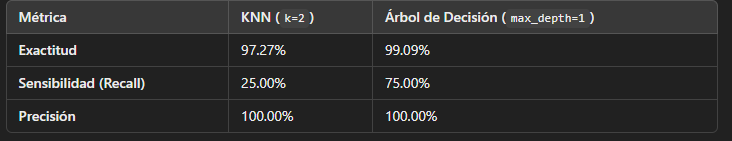
Observaciones:
1. Exactitud: El Árbol de Decisión supera al KNN en términos de exactitud, aunque la diferencia no es muy grande.
2. Sensibilidad (Recall): El Árbol de Decisión identifica un mayor porcentaje de pacientes hospitalizados (75% frente a 25% del KNN), siendo más efectivo para este caso clínico.
3. Precisión: Ambos modelos tienen precisión perfecta (100%), lo que significa que todas las predicciones positivas realizadas por ambos modelos son correctas.

- Conclusión:
KNN tiene un buen desempeño general, pero su baja sensibilidad lo hace menos adecuado para identificar pacientes hospitalizados, lo que puede ser crítico en un contexto médico.
El Árbol de Decisión con max_depth optimizado es preferible, ya que mantiene alta precisión mientras mejora significativamente la sensibilidad, identificando más pacientes hospitalizados.

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

# Respuesta 1. 

Estrategias para mejorar el desempeño del modelo de clasificación

1. Manejo del desbalance de clases:

Si las clases están desbalanceadas (menos hospitalizados que no hospitalizados), el modelo podría estar sesgado hacia la clase mayoritaria. Para abordar esto:
Sobremuestreo de la clase minoritaria (e.g., SMOTE).
Submuestreo de la clase mayoritaria.
Usar modelos con ponderación de clases como árboles de decisión o KNN con class_weight='balanced'.

2. Selección de características:

Reducir la dimensionalidad eliminando variables con poca relevancia (según la importancia de las características del Árbol de Decisión).
Aplicar técnicas como PCA (Análisis de Componentes Principales) para mejorar el rendimiento.

3. Optimización de hiperparámetros:

Usar búsqueda en rejilla (GridSearchCV) o búsqueda aleatoria (RandomizedSearchCV) para encontrar los mejores valores de parámetros como:
Profundidad máxima (max_depth) en árboles.
Número de vecinos (k) en KNN.
Métricas de distancia en KNN (e.g., Euclidiana, Manhattan).

4. Combinación de modelos (Ensemble Methods):

Aplicar métodos basados en ensambles que suelen mejorar el desempeño:
Bagging (e.g., Random Forests).
Boosting (e.g., Gradient Boosted Trees, XGBoost).
Stacking (combinación de modelos para mejorar predicciones).

5. Normalización o escalado:

Ya aplicada, pero esencial para modelos basados en distancia como KNN.

6. Ingeniería de características:

Crear nuevas variables derivadas de las existentes si son relevantes para el problema.
Por ejemplo, agrupar rangos de edad o PSA para capturar tendencias clínicas.

7. Aumentar el tamaño del dataset:

Incorporar más datos para mejorar la generalización del modelo.
Explorar datos similares de otros hospitales o años.

8. Evaluar diferentes modelos:

Explorar otros algoritmos como:
Regresión Logística: Simple y efectivo para problemas binarios.
Máquinas de Soporte Vectorial (SVM): Eficaz para datos con límites complejos.
Redes Neuronales: Para problemas no lineales complejos, si hay suficientes datos.

- Plan sugerido
Balanceo de clases con sobremuestreo.
Optimización de hiperparámetros usando búsqueda en rejilla.
Evaluar un ensamble como Random Forest o Gradient Boosting.



# Respuesta 2

Para mejorar el desempeño del modelo de clasificación, especialmente en un contexto donde identificar correctamente a los pacientes hospitalizados es crítico, se pueden aplicar varias estrategias:

1. Balancear las clases
Problema: La clase "Hospitalizado" está subrepresentada, lo que lleva a baja sensibilidad en modelos como KNN.
Soluciones:
Sobremuestreo: Aumentar artificialmente el número de muestras de la clase minoritaria (e.g., con SMOTE).
Submuestreo: Reducir el número de muestras de la clase mayoritaria.
Ponderación de clases: Dar más peso a la clase minoritaria en los algoritmos de clasificación.
2. Ajustar hiperparámetros
KNN:
Explorar diferentes valores de k más allá del óptimo actual (e.g., probar valores impares o más cercanos al tamaño de las clases).
Evaluar diferentes métricas de distancia (e.g., Manhattan, Chebyshev) en lugar de la distancia euclidiana.
Árbol de Decisión:
Ajustar otros parámetros como min_samples_split o min_samples_leaf para controlar el crecimiento del árbol.
3. Probar modelos avanzados
Modelos como Random Forest o Gradient Boosting (e.g., XGBoost, LightGBM) suelen manejar mejor problemas de clases desbalanceadas y capturan interacciones más complejas entre las variables.
Ventaja: Suelen tener mejor generalización y rendimiento.
4. Seleccionar características relevantes
Reducir las características menos relevantes, basándose en análisis de importancia de variables.
Ventaja: Simplifica el modelo y reduce ruido.
5. Normalización y Escalado
Aunque ya se normalizaron las variables, es útil verificar si ciertas variables específicas podrían beneficiarse de un enfoque diferente (e.g., robust scaler para manejar outliers).
6. Ensemble Models
Combinar varios modelos (e.g., Árbol de Decisión, KNN, Logistic Regression) mediante un ensamblado como Bagging o Boosting para mejorar la estabilidad y el rendimiento.
7. Validación cruzada y optimización bayesiana
Implementar validación cruzada más exhaustiva para garantizar que el modelo generalice bien.
Usar técnicas como búsqueda aleatoria o optimización bayesiana para encontrar los mejores hiperparámetros.
Propuesta inicial:
Balancear las clases con SMOTE.
Entrenar un modelo más robusto como Random Forest.
Realizar validación cruzada para confirmar mejoras.

# Respuesta 1

In [59]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Paso 1: Balanceo de clases usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Paso 2: Configurar un modelo de Random Forest con búsqueda en rejilla
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'class_weight': ['balanced', None]
}
random_forest = RandomForestClassifier(random_state=42)

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_resampled, y_resampled)

# Paso 3: Evaluar el mejor modelo en el conjunto de prueba
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calcular métricas para el modelo mejorado
improved_accuracy = accuracy_score(y_test, y_pred_rf)
improved_recall = recall_score(y_test, y_pred_rf)
improved_precision = precision_score(y_test, y_pred_rf)

# Generar el informe de clasificación
improved_report = classification_report(y_test, y_pred_rf, target_names=["No Hospitalizado", "Hospitalizado"])

# Resultados
best_params = grid_search.best_params_
best_params, improved_accuracy, improved_recall, improved_precision, improved_report


({'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100},
 0.990909090909091,
 0.75,
 1.0,
 '                  precision    recall  f1-score   support\n\nNo Hospitalizado       0.99      1.00      1.00       106\n   Hospitalizado       1.00      0.75      0.86         4\n\n        accuracy                           0.99       110\n       macro avg       1.00      0.88      0.93       110\n    weighted avg       0.99      0.99      0.99       110\n')